In [ ]:
# https://stackoverflow.com/questions/8230638/parallel-coordinates-plot-in-matplotlib

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.path import Path
import matplotlib.patches as patches
import numpy as np



# create some dummy data
yynames = ['P1', 'P2', 'P3', 'P4', 'P5']
NN1, NN2, NN3 = 10, 5, 8
NN = NN1 + NN2 + NN3
category = np.concatenate([np.full(NN1, 1), np.full(NN2, 2), np.full(NN3, 3)])
yy1 = np.random.uniform(0, 10, NN) + 7 * category
yy2 = np.sin(np.random.uniform(0, np.pi, NN)) ** category
yy3 = np.random.binomial(300, 1 - category / 10, NN)
yy4 = np.random.binomial(200, (category / 6) ** 1/3, NN)
yy5 = np.random.uniform(0, 800, NN)

In [ ]:
import pandas as pd
df = pd.DataFrame(data={'P1': yy1, 'P2': yy2, 'P3': yy3, 'P4': yy4, 'P5': yy5})
df.columns

Index(['P1', 'P2', 'P3', 'P4', 'P5'], dtype='object')

In [ ]:
def plot_pll(df, df_cols=None, percentile=50):
  fig, host = plt.subplots(figsize=(20,10))

  # organize the data
  # ys = np.dstack([y1, y2, y3, y4, y5])[0]

  display_df = df.copy() if df_cols is None else df[df_cols]
  # metric = display_df.iloc[: , -1]
  # last_column = df.iloc[: , -1]
  # df[df.a < np.percentile(df.a,95)]


  display_df = display_df[display_df.iloc[: , -1] > np.percentile(display_df.iloc[: , -1], 100-percentile)]
  ys = display_df.to_numpy()
  ynames = display_df.columns
  N = len(display_df)

  ymins = ys.min(axis=0)
  ymaxs = ys.max(axis=0)
  dys = ymaxs - ymins
  ymins -= dys * 0.05  # add 5% padding below and above
  ymaxs += dys * 0.05
  dys = ymaxs - ymins

  # transform all data to be compatible with the main axis
  zs = np.zeros_like(ys)
  zs[:, 0] = ys[:, 0]
  zs[:, 1:] = (ys[:, 1:] - ymins[1:]) / dys[1:] * dys[0] + ymins[0]


  axes = [host] + [host.twinx() for i in range(ys.shape[1] - 1)]
  for i, ax in enumerate(axes):
      ax.set_ylim(ymins[i], ymaxs[i])
      ax.spines['top'].set_visible(False)
      ax.spines['bottom'].set_visible(False)
      if ax != host:
          ax.spines['left'].set_visible(False)
          ax.yaxis.set_ticks_position('right')
          ax.spines["right"].set_position(("axes", i / (ys.shape[1] - 1)))

  host.set_xlim(0, ys.shape[1] - 1)
  host.set_xticks(range(ys.shape[1]))
  host.set_xticklabels(ynames, fontsize=14)
  host.tick_params(axis='x', which='major', pad=7)
  host.spines['right'].set_visible(False)
  host.xaxis.tick_top()
  host.set_title('Parallel Coordinates Plot', fontsize=18)

  colors = plt.cm.tab10.colors
  for j in range(N):
      # to just draw straight lines between the axes:
      # host.plot(range(ys.shape[1]), zs[j,:], c=colors[(category[j] - 1) % len(colors) ])

      # create bezier curves
      # for each axis, there will a control vertex at the point itself, one at 1/3rd towards the previous and one
      #   at one third towards the next axis; the first and last axis have one less control vertex
      # x-coordinate of the control vertices: at each integer (for the axes) and two inbetween
      # y-coordinate: repeat every point three times, except the first and last only twice
      verts = list(zip([x for x in np.linspace(0, len(ys) - 1, len(ys) * 3 - 2, endpoint=True)],
                      np.repeat(zs[j, :], 3)[1:-1]))
      # for x,y in verts: host.plot(x, y, 'go') # to show the control points of the beziers
      codes = [Path.MOVETO] + [Path.CURVE4 for _ in range(len(verts) - 1)]
      path = Path(verts, codes)
      patch = patches.PathPatch(path, facecolor='none', lw=1, edgecolor=colors[category[j] - 1])
      host.add_patch(patch)
  plt.tight_layout()
  plt.show()

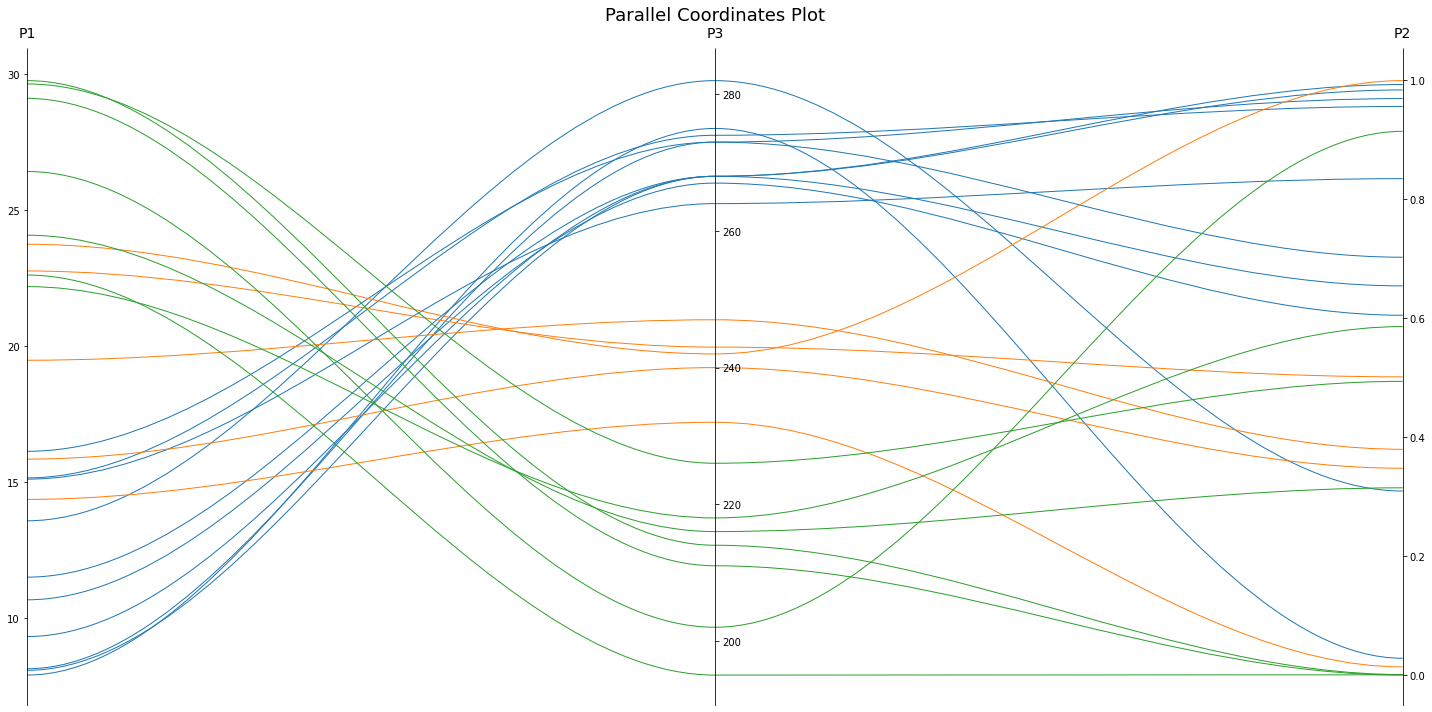

In [ ]:
plot_pll(df=df, df_cols=['P1', 'P3', 'P2'], percentile=100)

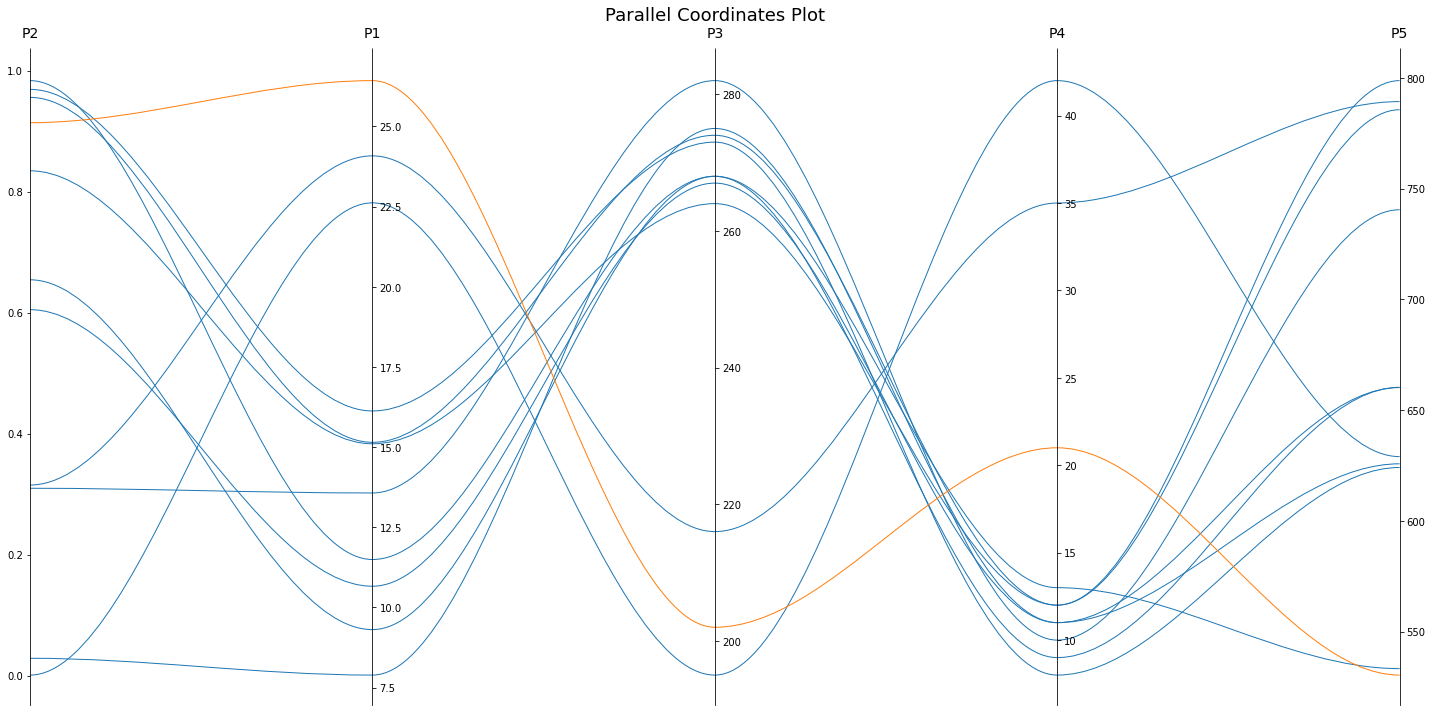

In [ ]:
df = pd.DataFrame(data={'P2': yy2, 'P1': yy1, 'P3': yy3, 'P4': yy4, 'P5': yy5})
plot_pll(df=df)

In [ ]:
import numpy as np
import pandas as pd
import ipywidgets as widgets
import matplotlib.pyplot as plt
import panel as pn
pn.extension()

In [ ]:
from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

In [ ]:
w = widgets.SelectMultiple(
    options=df.columns,
    value=tuple(df.columns),
    #rows=10,
    description='Parmaters',
    disabled=False
)
w

SelectMultiple(description='Parmaters', index=(0, 1, 2, 3, 4), options=('P2', 'P1', 'P3', 'P4', 'P5'), value=(…

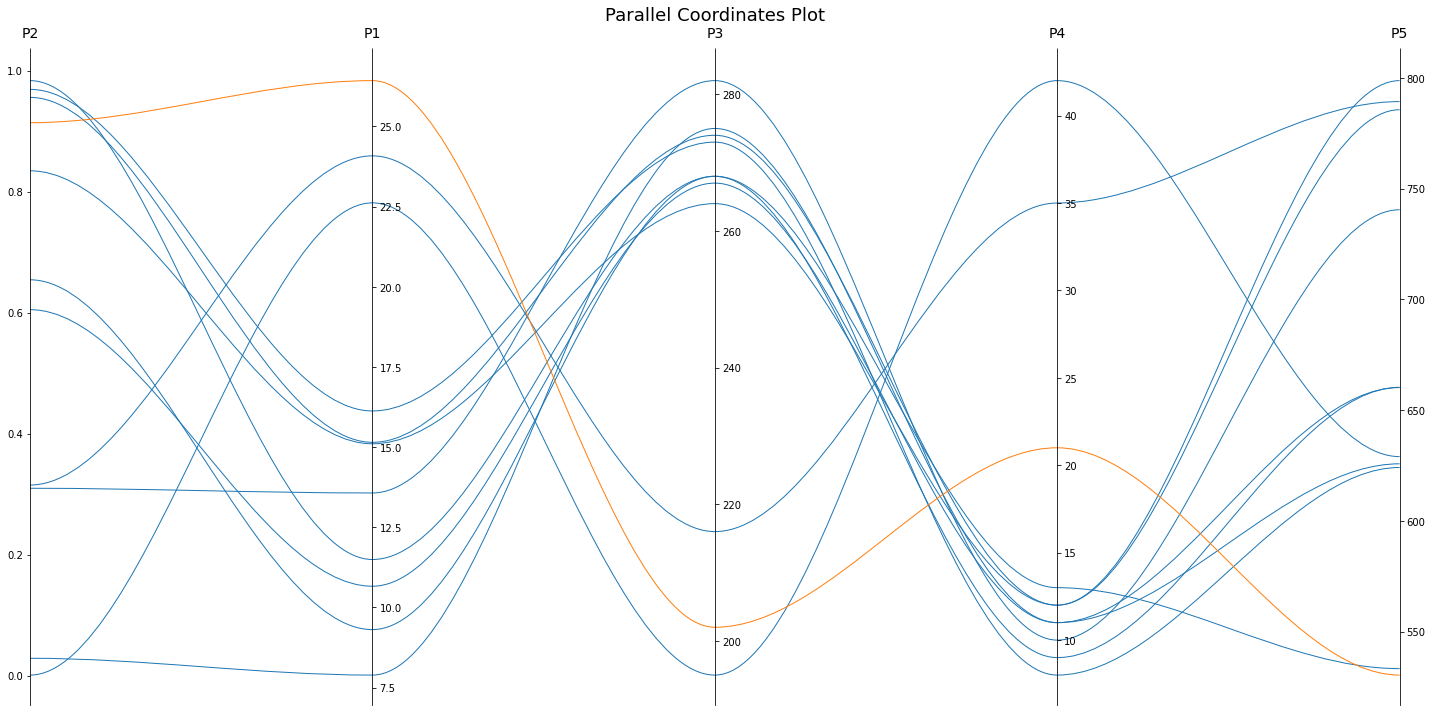

In [ ]:
plot_pll(df, list(w.value))

In [ ]:
import ipywidgets as widgets
d = widgets.SelectMultiple(
options=df.columns,
value=tuple(df.columns),
description='Parameters',
disabled=False
)

foo = []

def on_change(change):
    if change['type'] == 'change' and change['name'] == 'value':
        for elem in change['new']:
            if elem not in foo:
                foo.append(elem)
        for elem in foo:
            if elem not in change['new']:
                foo.remove(elem)


d.observe(on_change)
d

SelectMultiple(description='Parameters', index=(0, 1, 2, 3, 4), options=('P2', 'P1', 'P3', 'P4', 'P5'), value=…

IndexError: ignored

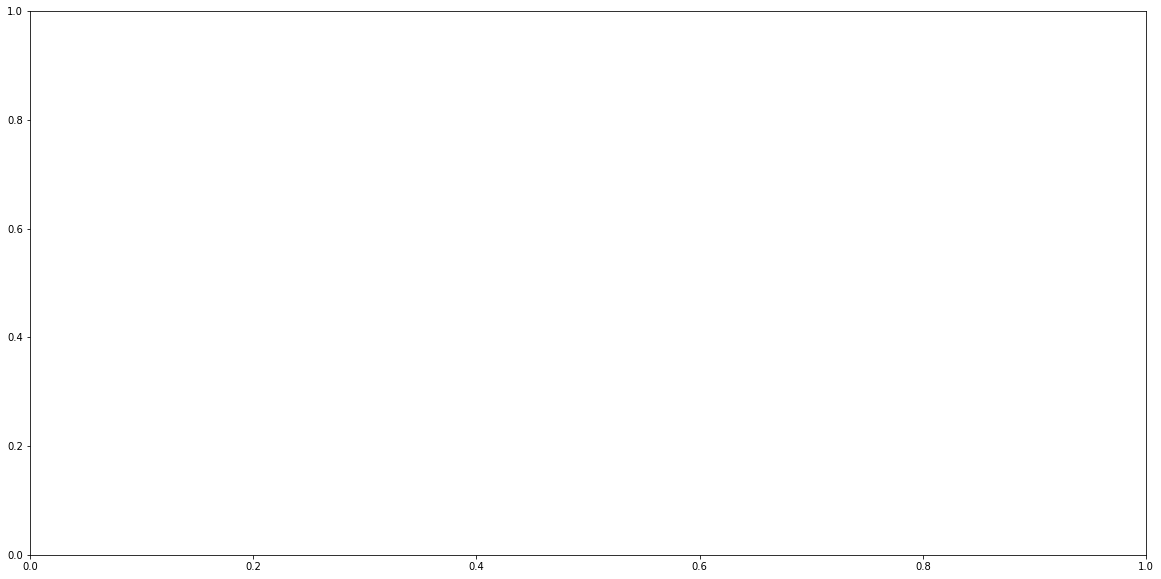

In [ ]:
plot_pll(df, list(foo))

In [ ]:
dff = df[df.P2 < np.percentile(df.P2,50)]
dff

In [ ]:
len(dff)

In [ ]:
import sqlite3

# Create a SQL connection to our SQLite database
con = sqlite3.connect("nni.sqlite")

cur = con.cursor()

# The result of a "cursor.execute" can be iterated over by row
for row in cur.execute("SELECT * FROM MetricData INNER JOIN TrialJobEvent on TrialJobEvent.trialJobId = MetricData.trialJobId"):
  if row[3] == 'FINAL' and row[8] == 'WAITING':
    print(row)

# Be sure to close the connection
con.close()

In [ ]:
names = list(map(lambda x: x[0], cur.description))
names

In [ ]:
con = sqlite3.connect("nni.sqlite")

cur = con.cursor()

# The result of a "cursor.execute" can be iterated over by row
for row in cur.execute("SELECT * FROM TrialJobEvent WHERE event='WAITING'"):
    print(row)

# Be sure to close the connection
con.close()

In [ ]:
names = list(map(lambda x: x[0], cur.description))
names

In [ ]:
cursor = con.cursor()
cursor.execute("SELECT name FROM sqlite_master WHERE type='table';")
print(cursor.fetchall())

In [ ]:
names = list(map(lambda x: x[0], cursor.description))

In [ ]:
names